In [ ]:
from typing import TypedDict, List, Union
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [4]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""

    state['result'] = f"Hi there {state['name']}! Your sum = {sum(state['values'])}"
    return state

In [5]:
graph1 = StateGraph(AgentState)
graph1.add_node("proc", process_values)
graph1.set_entry_point("proc")
graph1.set_finish_point("proc")

app1 = graph1.compile()

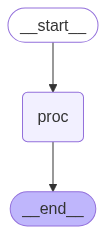

In [6]:
from IPython.display import Image, display
display(Image(app1.get_graph().draw_mermaid_png()))

In [7]:
res = app1.invoke({"values":[2,4,6,8], "name": "John" })

In [8]:
res["result"]

'Hi there John! Your sum = 20'

In [16]:
from functools import reduce
class StateSchema(TypedDict):
    name: str
    value: List[int]
    operator: str
    result: str

def task1(state: StateSchema) -> StateSchema:
    """Running conditional arimethic operation on inputs"""

    if state['operator'] == "+":
        state['result'] = f"Hi {state['name']}, your answer is: {sum(state['value'])}"
        return state
    elif state['operator'] == "*":
        answer = reduce(lambda acc, i:acc * i, state['value'], 1)
        state['result'] = f"Hi {state['name']}, your answer is: {answer}"
        return state

In [18]:
graph2 = StateGraph(StateSchema)
graph2.add_node("task1", task1)
graph2.set_entry_point("task1")
graph2.set_finish_point("task1")

app2 = graph2.compile().invoke({"name":"Jack Sparrow", "value":[1,2,3,4], "operator":"*"})

In [19]:
app2["result"]

'Hi Jack Sparrow, your answer is: 24'

48
